### Capstone _ H&M Recommendation System _ Nooshin Mollazadeh

*** In this NoteBook We are going to do some Data Analysis on the Customer dataset.

# Customer Table:

In [41]:
#Loading the customer table
customer=pd.read_csv('C:/Users/molla/Capstone/customer-main.csv')

In [42]:
#looking at the head of customer table
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [43]:
#Looking at the shape of customer table
customer.shape

(1371980, 7)

The customer table has 1,371,980 rows and 7 columns. It means we have 1,371,980 customers.

In [44]:
#see the columns
customer.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

- 'customer_id'

- 'FN'

- 'Active'

- 'club_member_status'

- 'fashion_news_frequency'

- 'age'

- 'postal_code'

In [45]:
#information of the values inside the customer table
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


Numerical columns:
- FN : Either they recieve fashion news or not
- Active : They have active profile or not
- age : Age of customer

String Columns:
- customer_id 
- club_member_status: Status of customers' club membership
- postal_code

In [46]:
#looking to the null values in columns
customer.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

There are null values in 5 columns.

In [47]:
customer['postal_code'].nunique()

352899

There are 352,899 unique postal codes in the table.

In [48]:
customer.duplicated().sum()

0

There is no duplicated rows in the dataset.

### FN Column:

In [49]:
customer['FN'].isnull()

0           True
1           True
2           True
3           True
4          False
           ...  
1371975     True
1371976     True
1371977    False
1371978    False
1371979     True
Name: FN, Length: 1371980, dtype: bool

In [50]:
#percentage of null values in FN column
FN_PercentofNulls=100*(customer['FN'].isnull().sum()/customer.shape[0])
FN_PercentofNulls

65.23783145526903

65% of the FN column is null.

In [51]:
customer['FN'].value_counts()

1.0    476930
Name: FN, dtype: int64

By checking FN column which Fashion News we see 895,050 people who chose to not recieve fashion news and 476,930 people who do  recieve fashion news. But we have null values in this volumn which I decide to add null values to the 0 group who do not recieve news because we do not know they recieve or not.

In [52]:
#filling null values
customer['FN'].fillna(value=0, inplace=True)

In [53]:
#sanity check
customer['FN'].isnull().sum()

0

In [54]:
customer['FN'].value_counts()

0.0    895050
1.0    476930
Name: FN, dtype: int64

### Active Column: 

In [55]:
#checking the values in Active
customer['Active'].value_counts()

1.0    464404
Name: Active, dtype: int64

In [56]:
#check the percentage of nulls in this column
Active_null_percent=100*(customer['Active'].isnull().sum()/customer.shape[0])
Active_null_percent

66.15081852505138

About 67% of the column does not contain any values There are 464,404 people who has active profiles and the rest with null values we assume they do not have active profiles. We assume that the rest with null values do not have active profile.

In [57]:
#Filling the null values
customer['Active'].fillna(value=0, inplace=True)

In [58]:
#sanity check
customer['Active'].isnull().sum()

0

In [59]:
customer['Active'].value_counts()

0.0    907576
1.0    464404
Name: Active, dtype: int64

### club_member_status:

In [60]:
customer['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

Active : Customers who are active.

PRE-CREATE: Customers who openned an account but not active yet.

Left Club: Customers who has left the club.

- 1,272,491 customers has active profile in club.
- 92,960 customers are goring to active their profile.
- 467 customers left the club.

In [61]:
#percentage of club_member_status null values
club_member_status_null_percent=100*(customer['club_member_status'].isnull().sum()/customer.shape[0])
club_member_status_null_percent

0.44184317555649494

Nearly 0.5% of club_member_status columns has null values.

In [62]:
#filling na values
customer['club_member_status'].fillna(value='PRE-CREATE', inplace=True)

In [63]:
#sanity check
customer['club_member_status'].isnull().sum()

0

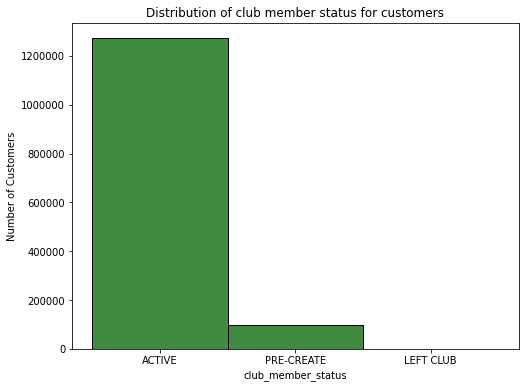

In [64]:
plt.figure(figsize=(8,6))
#plotting a histogram for club member status
sns.histplot(data=customer, x='club_member_status',color='darkgreen')

#title
plt.title('Distribution of club member status for customers')

#ylable
plt.ylabel('Number of Customers')

#I use this plain format because without it it would scale the y axis
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Figure 12:

Most of the customers have active status on club.

### fashion_news_frequency:

In [65]:
#unique values in this column and how many
customer['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

Customers recieve fashion news Monthly, Regularly or None.

In [66]:
customer['fashion_news_frequency'].isnull().sum()

16009

In [67]:
#percentage of null values
fashionnews_null_percent=100*(customer['fashion_news_frequency'].isnull().sum()/customer.shape[0])
fashionnews_null_percent

1.1668537442236768

There is just 1% of the column that has null values.

In [68]:
#filling the nulls with NONE because we do not know about it.
customer['fashion_news_frequency'].fillna(value='NONE', inplace=True)

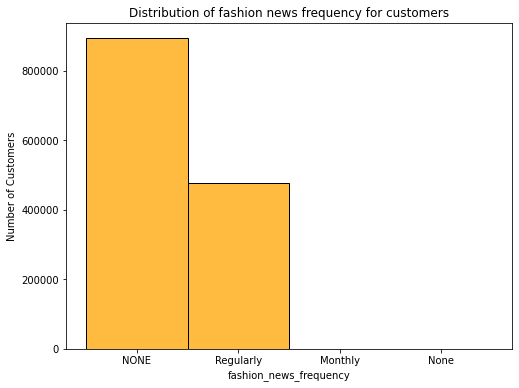

In [69]:
#look at the count of the fashion news column values using histogram
plt.figure(figsize=(8,6))

sns.histplot(data=customer, x='fashion_news_frequency', color='orange')

plt.title('Distribution of fashion news frequency for customers')

plt.ylabel('Number of Customers')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

### Figure 13:

Most of the Customers do not want to recieve fashion news.

In [70]:
#combining all the none together
customer['fashion_news_frequency'].replace(to_replace='None', value='NONE', inplace=True)

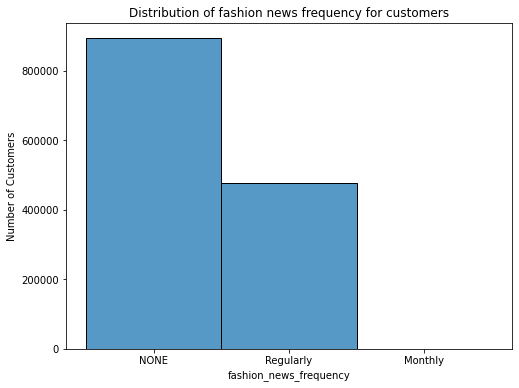

In [71]:
#look at the count of the fashion news column after combining the none values values using histogram
plt.figure(figsize=(8,6))

sns.histplot(data=customer, x='fashion_news_frequency')

plt.title('Distribution of fashion news frequency for customers')

plt.ylabel('Number of Customers')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

### Figure 14:

The great number of customers do not want to recieve fashion news while a very small group recieve it Monthly.

### Age:

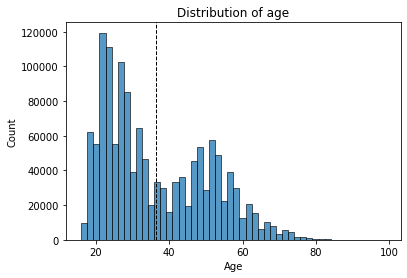

In [72]:
#looking at the frequency of age 


ax = sns.histplot(data=customer, x='age', bins=50)

#calculating mean
mean= customer['age'].mean()

#drawing mean v line
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='mean')

#xlabel
ax.set_xlabel('Age')

plt.title('Distribution of age')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Figure 15:

We are going to fill na values in age column with median value.

In [73]:
#mean
mean=customer['age'].mean()

#maximum age
Max=customer['age'].max()

#minimum age
Min=customer['age'].min()

#median
Median = customer['age'].median()

#filling na
customer['age'].fillna(value=round(Median,2), inplace=True)

In [74]:
print(mean)
print(Max)
print(Min)

36.386964565794
99.0
16.0


- The average age of the customers is about 36 year old.
- The oldest customer is 99 year old.
- The youngest customer is 16 year old.

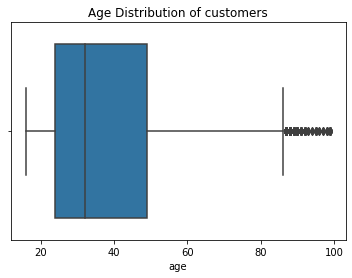

In [75]:
#box plot for age distribution
sns.boxplot(x=customer['age'] )

plt.xticks(fontsize = 10)

plt.title('Age Distribution of customers')

plt.show()

### Figure 16:

The distribution shows the customers' age are mainly between 22 and 45.

***